In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
loans = pd.read_csv('lending-club-data.csv', low_memory=False)
pd.set_option('display.max_columns',None)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,not_compliant,status,inactive_loans,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,19850101T000000,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,20150101T000000,171.62,NaN,20150101T000000,0.0,NaN,1,0,Fully Paid,1,0,11,5,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,20111201T000000,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,19990401T000000,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,20130401T000000,119.66,NaN,20130901T000000,0.0,NaN,1,0,Charged Off,1,1,1,4,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,20011101T000000,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,20140601T000000,649.91,NaN,20150201T000000,0.0,NaN,1,0,Fully Paid,1,0,11,4,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,19960201T000000,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,20150101T000000,357.48,NaN,20150101T000000,0.0,NaN,1,0,Fully Paid,1,0,11,4,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,20111201T000000,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,20041101T000000,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.38,5631.38,5000.00,631.38,0.00,0.00,0.00,20150101T000000,161.03,NaN,20150201T000000,0.0,NaN,1,0,Fully Paid,1,0,4,6,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [57]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122607 entries, 0 to 122606
Data columns (total 68 columns):
id                             122607 non-null int64
member_id                      122607 non-null int64
loan_amnt                      122607 non-null int64
funded_amnt                    122607 non-null int64
funded_amnt_inv                122607 non-null int64
term                           122607 non-null object
int_rate                       122607 non-null float64
installment                    122607 non-null float64
grade                          122607 non-null object
sub_grade                      122607 non-null object
emp_title                      115767 non-null object
emp_length                     118516 non-null object
home_ownership                 122607 non-null object
annual_inc                     122603 non-null float64
is_inc_v                       122607 non-null object
issue_d                        122607 non-null object
loan_status                

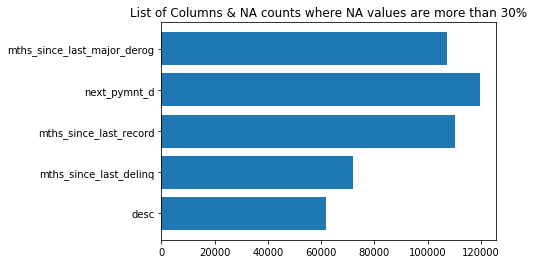

In [58]:
# Number of Nan in each columns
columns_with_na = []
total_na = []
for col in loans.columns:
    if loans[col].isna().sum() > 0.3 * len(loans):
        columns_with_na.append(col)
        total_na.append(loans[col].isna().sum())
        
# Bar Chart of all Nan values
fig, ax = plt.subplots()
ax.barh(columns_with_na, total_na)
ax.set_title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [59]:
# Dropping all columns where number of Na values is greated than 30%
loans_columns = [col for col in loans.columns if col not in columns_with_na]
print(f'Total Number of Columns before removing columns = {len(loans.columns)}')
print(f'Total Number of Columns after removing columns = {len(loans_columns)}')
loans = loans[loans_columns]  

Total Number of Columns before removing columns = 68
Total Number of Columns after removing columns = 63


In [60]:
## Drop all rows which have Na values
loans_with_na_rows = [col for col in loans.columns if loans[col].isna().sum() > 0]
total_na_rows = [(col, loans[col].isna().sum()) for col in loans_with_na_rows]

In [61]:
sorted(total_na_rows, key = lambda x:x[1])[::-1]

[('emp_title', 6840),
 ('emp_length', 4091),
 ('last_pymnt_d', 336),
 ('collections_12_mths_zero', 145),
 ('collections_12_mths_ex_med', 145),
 ('pub_rec_zero', 29),
 ('delinq_2yrs_zero', 29),
 ('total_acc', 29),
 ('pub_rec', 29),
 ('open_acc', 29),
 ('inq_last_6mths', 29),
 ('earliest_cr_line', 29),
 ('delinq_2yrs', 29),
 ('title', 11),
 ('last_credit_pull_d', 6),
 ('payment_inc_ratio', 4),
 ('annual_inc', 4)]

In [62]:
#loans = loans[~((loans['emp_title'].isna()) & (loans['emp_length'].isna())).to_numpy()]
loans = loans.dropna()

In [63]:
# Dropping irrelevant columns
loans = loans.drop(['id','member_id','url','zip_code'], axis = 1)

In [64]:
# Cast all continuous variables to numeric
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loans[numeric_columns] = loans[numeric_columns].astype('float64')

#### Derived Metrics

In [65]:
# Loan amount to Annual Income ratio
loans['loan_income_ratio'] = loans['loan_amnt']/loans['annual_inc']

In [66]:
# Create bin for loan amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slots = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loans['loam_amount_range'] = pd.cut(loans['loan_amnt'], bins, labels=slots)

# Create bin for annual income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loans['annual_inc_range'] = pd.cut(loans['annual_inc'], bins, labels=slot)

# Create bins for interest rate
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loans['int_rate_range'] = pd.cut(loans['int_rate'], bins, labels=slot)

#### Univariate Analysis

count    115250.000000
mean      12904.161388
std        7908.489429
min         500.000000
25%        7000.000000
50%       11100.000000
75%       17975.000000
max       35000.000000
Name: loan_amnt, dtype: float64


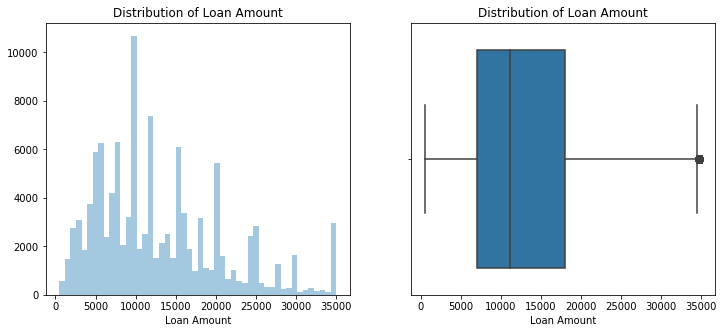

In [67]:
# Loan Amount Distribution
print(loans['loan_amnt'].describe())
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (12,5))
sns.distplot(loans['loan_amnt'], kde=False, ax = ax[0])
sns.boxplot(loans['loan_amnt'], ax = ax[1])
ax[0].set_title('Distribution of Loan Amount')
ax[0].set_xlabel('Loan Amount')
ax[1].set_title('Distribution of Loan Amount')
ax[1].set_xlabel('Loan Amount')
plt.show()

Insight : Most of the Loan Amount are distributed between 5000 - 20000 USD

count    115250.000000
mean         13.656873
std           4.383984
min           5.420000
25%          10.640000
50%          13.490000
75%          16.290000
max          26.060000
Name: int_rate, dtype: float64


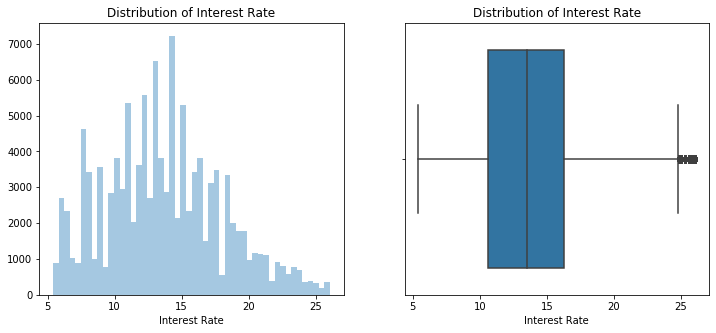

In [68]:
# Interest Rate Distribution
print(loans['int_rate'].describe())
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (12,5))
sns.distplot(loans['int_rate'], kde=False, ax = ax[0])
sns.boxplot(loans['int_rate'], ax = ax[1])
ax[0].set_title('Distribution of Interest Rate')
ax[0].set_xlabel('Interest Rate')
ax[1].set_title('Distribution of Interest Rate')
ax[1].set_xlabel('Interest Rate')
plt.show()

Insight : Most of the Loan Amount are distributed between 10 % - 16 %

In [69]:
# Annual Income Distribution
print(loans['annual_inc'].describe())

count    1.152500e+05
mean     7.190585e+04
std      5.854848e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.146400e+04
75%      8.500000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64


Insight : Maximum salary is 7141778 which is 115 times larger than median salary of 61464. So, We need to remove the outliers

In [70]:
q = loans['annual_inc'].quantile(0.995)
print(f'Number of Rows before removing outliers = {len(loans)}')
loans = loans[loans['annual_inc'] < q]
print(f'Number of Rows after removing outliers = {len(loans)}')

Number of Rows before removing outliers = 115250
Number of Rows after removing outliers = 114658


count    114658.000000
mean      69769.330993
std       36827.526907
min        1896.000000
25%       45000.000000
50%       61000.000000
75%       85000.000000
max      296000.000000
Name: annual_inc, dtype: float64


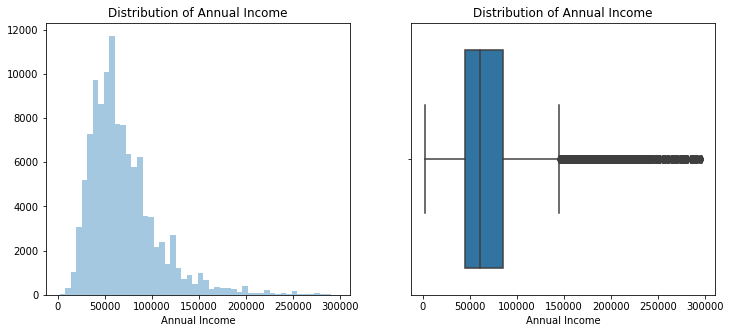

In [71]:
# Annual Income Distribution
print(loans['annual_inc'].describe())
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (12,5))
sns.distplot(loans['annual_inc'], kde=False, ax = ax[0])
sns.boxplot(loans['annual_inc'], ax = ax[1])
ax[0].set_title('Distribution of Annual Income')
ax[0].set_xlabel('Annual Income')
ax[1].set_title('Distribution of Annual Income')
ax[1].set_xlabel('Annual Income')
plt.show()

Insight : Most of the applicants earn between 40000 and 90000 USD

Fully Paid     93750
Charged Off    20693
Default          215
Name: status, dtype: int64


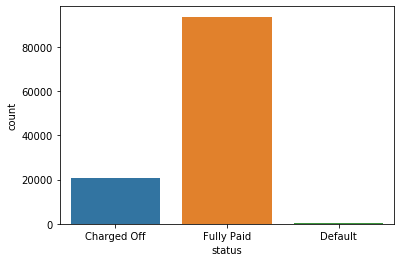

In [72]:
# Loan Status
print(loans['status'].value_counts())
fig, ax = plt.subplots()
sns.countplot(loans['status'])
plt.show()

Insight : 0.1 % of the applicants are defaulter and 18.04 % are charged off

#### Preparing dataset for modeling

In [73]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'delinq_2yrs',               # number of delinquincies
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [74]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans', axis=1)

In [75]:
loans = loans[features + ['safe_loans']]
X = loans.drop('safe_loans',axis=1)
y = loans['safe_loans']

In [76]:
y.value_counts()

 1    93750
-1    20908
Name: safe_loans, dtype: int64

In [77]:
X.describe()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,open_acc,pub_rec,pub_rec_zero,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
count,114658.000000,114658.000000,114658.000000,114658.000000,114658.00000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000,114658.000000
mean,0.091245,6.598990,15.592003,0.587678,0.87345,53.958313,0.212659,0.857707,0.976129,10.518769,0.100237,0.910569,0.723858,13.655656,1707.889490,69769.330993,12784.400347,12550.840421,397.573604
std,0.287959,3.597288,7.443370,0.492255,0.33247,25.598031,0.663750,0.349352,1.252788,4.713831,0.350890,0.285366,5.285096,4.382929,1788.856895,36827.526907,7822.891878,7882.090384,236.760493
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.420000,0.000000,1896.000000,500.000000,0.000000,15.670000
25%,0.000000,3.000000,10.040000,0.000000,1.00000,35.200000,0.000000,1.000000,0.000000,7.000000,0.000000,1.000000,0.000000,10.640000,561.695000,45000.000000,7000.000000,6400.000000,219.040000
50%,0.000000,6.000000,15.370000,1.000000,1.00000,55.900000,0.000000,1.000000,1.000000,10.000000,0.000000,1.000000,0.000000,13.490000,1150.270000,61000.000000,11000.000000,10700.000000,349.840000
75%,0.000000,11.000000,20.900000,1.000000,1.00000,74.500000,0.000000,1.000000,2.000000,13.000000,0.000000,1.000000,0.000000,16.290000,2184.877500,85000.000000,17475.000000,17000.000000,522.245000
max,1.000000,11.000000,39.880000,1.000000,1.00000,150.700000,29.000000,1.000000,32.000000,76.000000,10.000000,1.000000,208.820000,26.060000,20758.200000,296000.000000,35000.000000,35000.000000,1408.130000


In [78]:
np.issubdtype(X['home_ownership'], np.generic) #Testing
np.issubdtype(X['dti'], np.number) #Testing

True

In [80]:
num_features = X.columns[X.dtypes.apply(lambda x:np.issubdtype(x, np.number))]

In [81]:
X[num_features]

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,open_acc,pub_rec,pub_rec_zero,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
1,1,1,1.00,1,1,9.4,0.0,1.0,5.0,3.0,0.0,1.0,0.00,15.27,435.17,30000.0,2500.0,2500.0,59.83
3,0,11,20.00,0,1,21.0,0.0,1.0,1.0,10.0,0.0,1.0,16.97,13.49,2209.33,49200.0,10000.0,10000.0,339.31
4,0,4,11.20,1,1,28.3,0.0,1.0,3.0,9.0,0.0,1.0,0.00,7.90,631.38,36000.0,5000.0,5000.0,156.46
5,0,10,5.35,1,1,87.5,0.0,1.0,2.0,4.0,0.0,1.0,0.00,18.64,938.14,48000.0,3000.0,3000.0,109.43
7,1,1,18.08,1,1,36.5,0.0,1.0,0.0,2.0,0.0,1.0,0.00,12.69,533.42,15000.0,5375.0,5350.0,121.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122601,0,5,18.69,0,1,29.5,1.0,0.0,2.0,14.0,0.0,1.0,0.00,13.53,497.25,45000.0,6000.0,6000.0,203.70
122603,0,11,11.26,0,0,15.2,1.0,0.0,2.0,8.0,2.0,0.0,0.00,17.57,654.95,65000.0,15250.0,15250.0,548.05
122604,0,6,12.28,0,0,10.7,4.0,0.0,0.0,12.0,0.0,1.0,0.00,18.25,510.45,37536.0,8525.0,8525.0,217.65
122605,0,11,18.45,1,1,46.3,0.0,1.0,5.0,18.0,1.0,0.0,0.00,19.97,2840.88,78000.0,22000.0,22000.0,582.50


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [83]:
X.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,open_acc,pub_rec,pub_rec_zero,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
1,C,C4,3.155863,-1.556454,RENT,-1.960411,car,60 months,0.837623,0.380638,-1.740701,-0.320391,0.407307,3.211946,-1.595051,-0.285667,0.313392,-0.136963,0.368327,-0.711474,-1.079885,-1.314660,-1.275155,-1.426526
3,C,C1,-0.316871,1.223430,RENT,0.592207,other,36 months,-1.193855,0.380638,-1.287539,-0.320391,0.407307,0.019054,-0.110053,-0.285667,0.313392,3.073967,-0.037796,0.280315,-0.558534,-0.355931,-0.323626,-0.246088
4,A,A4,-0.316871,-0.722489,RENT,-0.590058,wedding,36 months,0.837623,0.380638,-1.002359,-0.320391,0.407307,1.615500,-0.322196,-0.285667,0.313392,-0.136963,-1.313204,-0.601789,-0.916963,-0.995084,-0.957979,-1.018391
5,E,E1,-0.316871,0.945441,RENT,-1.375996,car,36 months,0.837623,0.380638,1.310329,-0.320391,0.407307,0.817277,-1.382908,-0.285667,0.313392,-0.136963,1.137223,-0.430304,-0.591118,-1.250745,-1.211719,-1.217031
7,B,B5,3.155863,-1.556454,RENT,0.334258,other,60 months,0.837623,0.380638,-0.682021,-0.320391,0.407307,-0.779169,-1.807194,-0.285667,0.313392,-0.136963,-0.220323,-0.656550,-1.487191,-0.947148,-0.913574,-1.166262


In [84]:
X = pd.get_dummies(X, drop_first=True)

In [85]:
X.head()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,open_acc,pub_rec,pub_rec_zero,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months
1,3.155863,-1.556454,-1.960411,0.837623,0.380638,-1.740701,-0.320391,0.407307,3.211946,-1.595051,-0.285667,0.313392,-0.136963,0.368327,-0.711474,-1.079885,-1.314660,-1.275155,-1.426526,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.316871,1.223430,0.592207,-1.193855,0.380638,-1.287539,-0.320391,0.407307,0.019054,-0.110053,-0.285667,0.313392,3.073967,-0.037796,0.280315,-0.558534,-0.355931,-0.323626,-0.246088,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.316871,-0.722489,-0.590058,0.837623,0.380638,-1.002359,-0.320391,0.407307,1.615500,-0.322196,-0.285667,0.313392,-0.136963,-1.313204,-0.601789,-0.916963,-0.995084,-0.957979,-1.018391,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,-0.316871,0.945441,-1.375996,0.837623,0.380638,1.310329,-0.320391,0.407307,0.817277,-1.382908,-0.285667,0.313392,-0.136963,1.137223,-0.430304,-0.591118,-1.250745,-1.211719,-1.217031,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,3.155863,-1.556454,0.334258,0.837623,0.380638,-0.682021,-0.320391,0.407307,-0.779169,-1.807194,-0.285667,0.313392,-0.136963,-0.220323,-0.656550,-1.487191,-0.947148,-0.913574,-1.166262,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [86]:
X.shape

(114658, 74)

#### Undersampling approach

In [ ]:
from sklearn.model_selection import StratifiedKFold

def model_train_val_cv_undersampling(X,y,model,n_estimators=3,cv=StratifiedKFold(5,random_state=1)):
    for train_index, val_index in cv.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        for i in range(n_estimators):
            

In [95]:
num1 = len(y[y == -1])
ind1 = np.random.choice(y.index[y==1], num1)
print(num1, len(ind1))

20908 20908
